# EMNIST Dataset - Data Loading and Exploration

This notebook is dedicated to loading the EMNIST dataset, exploring its structure, and visualizing some sample images. 

- **Dataset:** EMNIST (Extended MNIST) Letters Dataset
- **Source:** [Kaggle - EMNIST Dataset](https://www.kaggle.com/datasets/crawford/emnist)
- **Sections:**
  - Loading the dataset from the raw folder.
  - Exploring the data dimensions and structure.
  - Visualizing some sample images.


In [1]:
# 1. Setup and Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Ensure we can import from src
src_path = os.path.abspath(os.path.join(os.getcwd(), "../src"))
sys.path.append(src_path)
print(f"src directory added: {src_path}")

# Create the reports directory if it doesn't exist
os.makedirs("../report", exist_ok=True)


src directory added: c:\Users\syamg\Desktop\emnist_ml_project\src


In [2]:
# 2. Loading the Dataset (Modular with load_data.py)
from load_data import load_emnist_data

# Load EMNIST Balanced Subset
X_train, y_train, X_test, y_test = load_emnist_data(subset="balanced")


Loaded EMNIST balanced subset.
Training Data Shape: (112800, 784), (112800,)
Testing Data Shape: (18800, 784), (18800,)


In [3]:
# 3. Data Cleaning and Preprocessing (Using Balanced Subset)
from preprocess_data import preprocess_images
from save_and_load import save_processed_data, load_processed_data
import os

# Check if processed data exists
if all(os.path.exists(f"../data/processed/processed_data_{name}.npy") for name in ["X_train", "y_train", "X_test", "y_test"]):
    print("\nLoading preprocessed data from processed folder...")
    X_train, y_train, X_test, y_test = load_processed_data()
else:
    print("\nPreprocessing raw data...")
    from load_data import load_emnist_data
    X_train, y_train, X_test, y_test = load_emnist_data(subset="balanced")

    # Preprocess the images (normalize)
    X_train = preprocess_images(X_train)
    X_test = preprocess_images(X_test)

    # Save the processed data
    save_processed_data(X_train, y_train, X_test, y_test)



Preprocessing raw data...
Loaded EMNIST balanced subset.
Training Data Shape: (112800, 784), (112800,)
Testing Data Shape: (18800, 784), (18800,)

🔄 Normalizing image data...
Image data normalized.

🔄 Normalizing image data...
Image data normalized.
Processed data saved to ../data/processed/


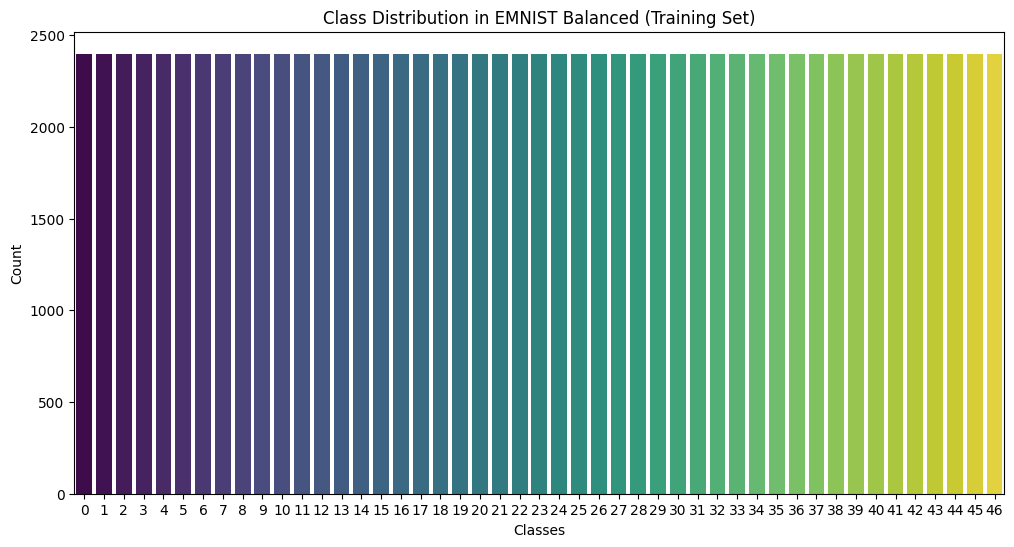

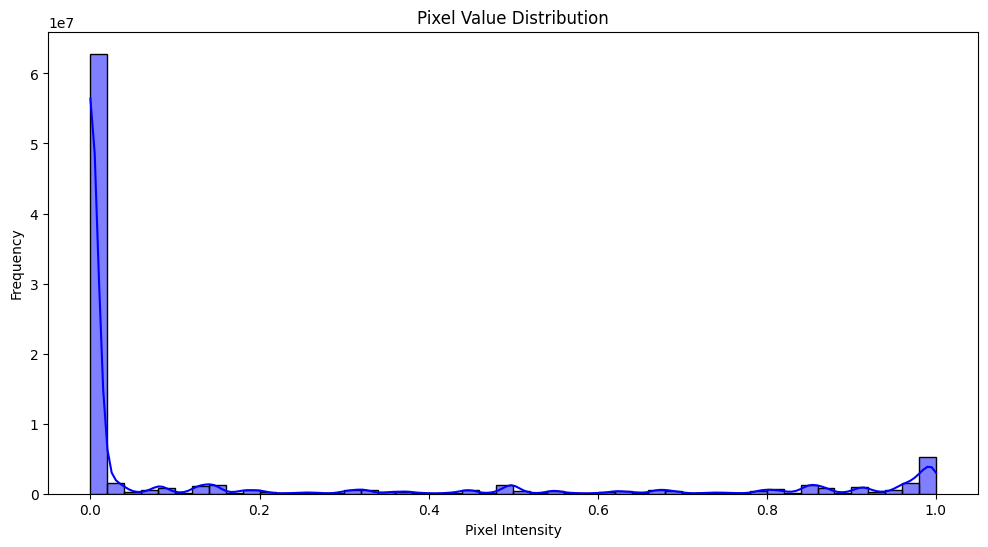

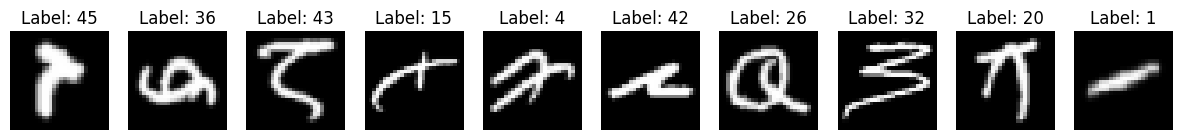


Generating Correlation Heatmap...


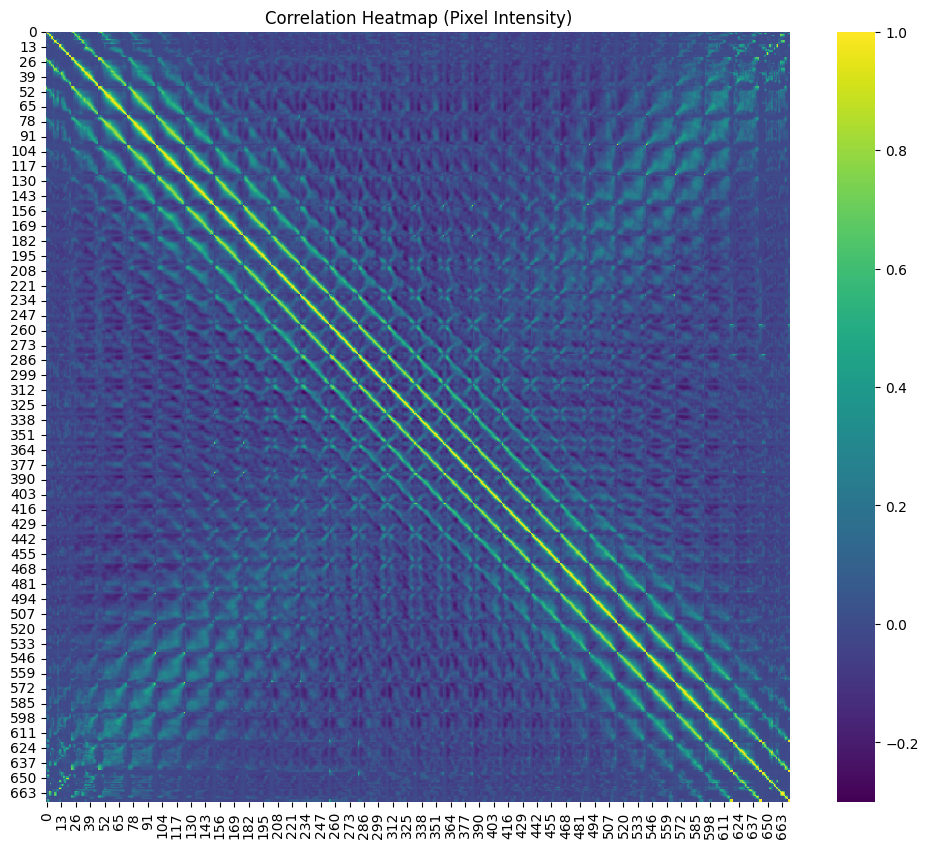

Missing Values in the Dataset: 0
No missing values detected.


In [4]:
# 4. Enhanced Exploratory Data Analysis (EDA)
from explore_data import (
    explore_class_distribution, 
    analyze_pixel_distribution, 
    visualize_sample_images,
    correlation_heatmap,
    missing_value_analysis
)

# EDA: Class Distribution
explore_class_distribution(y_train, title="Class Distribution in EMNIST Balanced (Training Set)")

# EDA: Pixel Value Distribution
analyze_pixel_distribution(X_train)

# EDA: Visualize Sample Images
visualize_sample_images(X_train, y_train, samples=10)

# EDA: Correlation Heatmap (Advanced)
correlation_heatmap(X_train, sample_size=500)

# EDA: Missing Value Analysis
missing_value_analysis(X_train)


In [5]:
# 5. Feature Engineering (Enhanced with Advanced Features)
from feature_engineering import extract_pixel_features, augment_images

# Using advanced pixel features
X_train_features = extract_pixel_features(X_train)
X_test_features = extract_pixel_features(X_test)

# Optional: Augment Images (for training)
X_train_aug, y_train_aug = augment_images(X_train, y_train, augment_factor=2)

print(f"Advanced Feature Shape (Train): {X_train_features.shape}")
print(f"Advanced Feature Shape (Test): {X_test_features.shape}")
print(f"Augmented Data Shape: {X_train_aug.shape}, {y_train_aug.shape}")



Extracting pixel intensity features...
Extracted pixel features. Shape: (112800, 12)

Extracting pixel intensity features...
Extracted pixel features. Shape: (18800, 12)

Augmenting images...
Augmented 112800 images to 789600 images.
Advanced Feature Shape (Train): (112800, 12)
Advanced Feature Shape (Test): (18800, 12)
Augmented Data Shape: (789600, 28, 28), (789600,)


y_train shape: (112800,), y_test shape: (18800,)

Training Logistic Regression Model...

Training Logistic Regression...
Model saved as: ../models\logistic_regression.pkl
Model saved as: ../models/logistic_regression.pkl

Evaluating Model...
Model Accuracy: 0.0213

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       400
           1       0.00      0.00      0.00       400
           2       0.00      0.00      0.00       400
           3       0.00      0.00      0.00       400
           4       0.00      0.00      0.00       400
           5       0.00      0.00      0.00       400
           6       0.00      0.00      0.00       400
           7       0.00      0.00      0.00       400
           8       0.02      1.00      0.04       400
           9       0.00      0.00      0.00       400
          10       0.00      0.00      0.00       400
          11       0.00      0.00      0.00       400
        

c:\Users\syamg\Desktop\emnist_ml_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\syamg\Desktop\emnist_ml_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\syamg\Desktop\emnist_ml_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

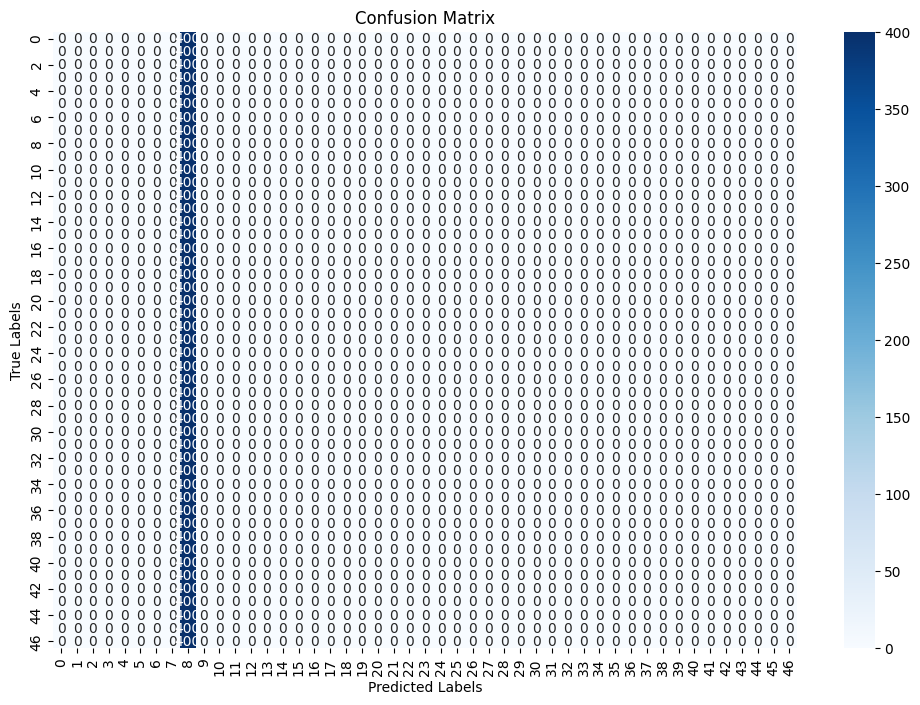


Training K-Nearest Neighbors (KNN) Model...

Training K-Nearest Neighbors (KNN)...
Model saved as: ../models\knn.pkl

Evaluating Model...
Model Accuracy: 0.2344

Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.38      0.17       400
           1       0.40      0.58      0.47       400
           2       0.10      0.22      0.13       400
           3       0.20      0.36      0.26       400
           4       0.10      0.21      0.13       400
           5       0.14      0.27      0.19       400
           6       0.30      0.45      0.36       400
           7       0.36      0.56      0.44       400
           8       0.13      0.18      0.15       400
           9       0.27      0.35      0.31       400
          10       0.11      0.13      0.12       400
          11       0.23      0.30      0.26       400
          12       0.15      0.19      0.16       400
          13       0.16      0.17      0.16       400
   

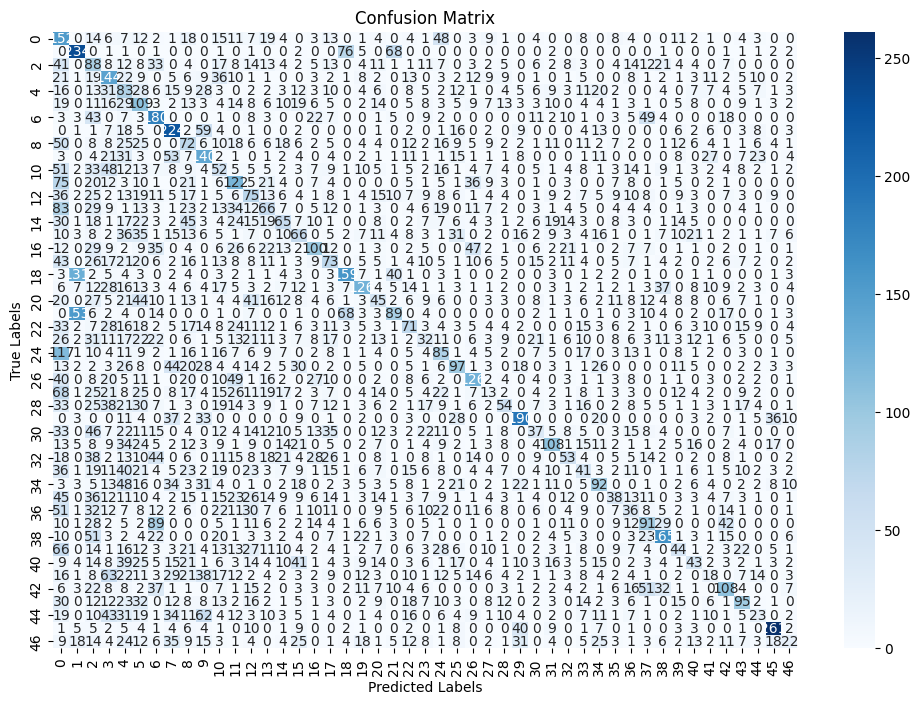


Training Decision Tree Model...

Training Decision Tree...
Model saved as: ../models\decision_tree.pkl

Evaluating Model...
Model Accuracy: 0.2479

Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.07      0.08       400
           1       0.48      0.66      0.56       400
           2       0.19      0.15      0.17       400
           3       0.32      0.33      0.32       400
           4       0.20      0.12      0.15       400
           5       0.26      0.10      0.14       400
           6       0.35      0.45      0.39       400
           7       0.40      0.53      0.45       400
           8       0.45      0.13      0.21       400
           9       0.31      0.41      0.35       400
          10       0.18      0.13      0.15       400
          11       0.23      0.38      0.29       400
          12       0.13      0.18      0.15       400
          13       0.10      0.23      0.14       400
          14     

c:\Users\syamg\Desktop\emnist_ml_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\syamg\Desktop\emnist_ml_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\syamg\Desktop\emnist_ml_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

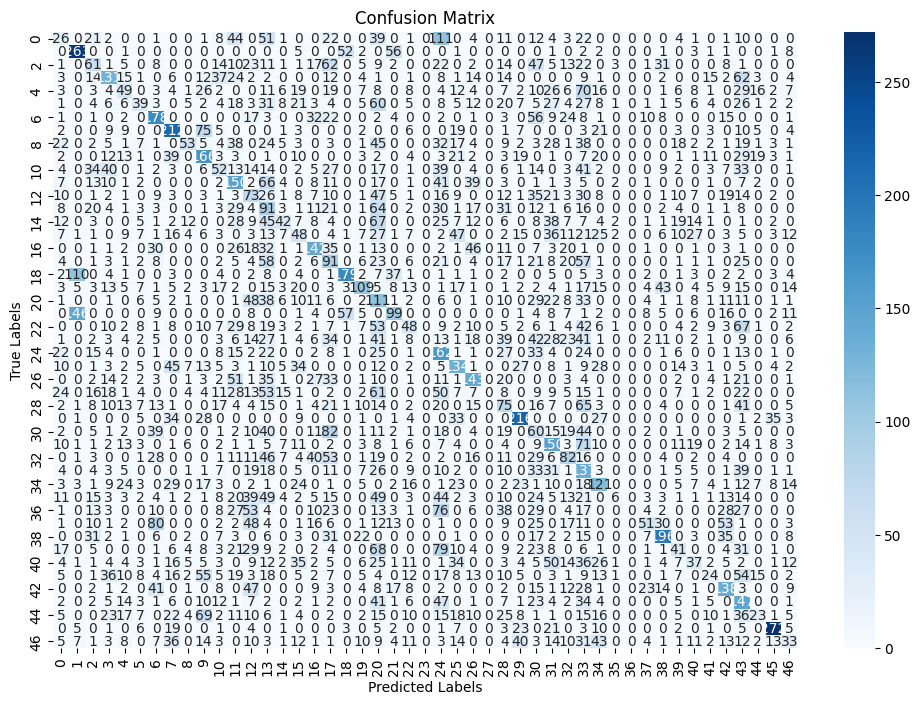

In [6]:
# 6. Model Training and Evaluation
from models import train_logistic_regression, train_knn, train_decision_tree, evaluate_model

# Ensure y_train and y_test are in 1D numeric format
y_train_numeric = y_train  # Already numeric for Balanced
y_test_numeric = y_test

print(f"y_train shape: {y_train_numeric.shape}, y_test shape: {y_test_numeric.shape}")

# Using extracted pixel features for training
X_train_flat = X_train_features
X_test_flat = X_test_features

# Training Logistic Regression
print("\nTraining Logistic Regression Model...")
logistic_model = train_logistic_regression(X_train_flat, y_train_numeric)
evaluate_model(logistic_model, X_test_flat, y_test_numeric)

# Training K-Nearest Neighbors (KNN)
print("\nTraining K-Nearest Neighbors (KNN) Model...")
knn_model = train_knn(X_train_flat, y_train_numeric, n_neighbors=5)
evaluate_model(knn_model, X_test_flat, y_test_numeric)

# Training Decision Tree
print("\nTraining Decision Tree Model...")
decision_tree_model = train_decision_tree(X_train_flat, y_train_numeric, max_depth=10)
evaluate_model(decision_tree_model, X_test_flat, y_test_numeric)



Loading Saved Models...
Loaded model: logistic_regression.pkl
Loaded model: knn.pkl
Loaded model: decision_tree.pkl

Evaluating Loaded Models...

Evaluating Model...
Model Accuracy: 0.0213

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       400
           1       0.00      0.00      0.00       400
           2       0.00      0.00      0.00       400
           3       0.00      0.00      0.00       400
           4       0.00      0.00      0.00       400
           5       0.00      0.00      0.00       400
           6       0.00      0.00      0.00       400
           7       0.00      0.00      0.00       400
           8       0.02      1.00      0.04       400
           9       0.00      0.00      0.00       400
          10       0.00      0.00      0.00       400
          11       0.00      0.00      0.00       400
          12       0.00      0.00      0.00       400
          13       0.00      

c:\Users\syamg\Desktop\emnist_ml_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\syamg\Desktop\emnist_ml_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\syamg\Desktop\emnist_ml_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

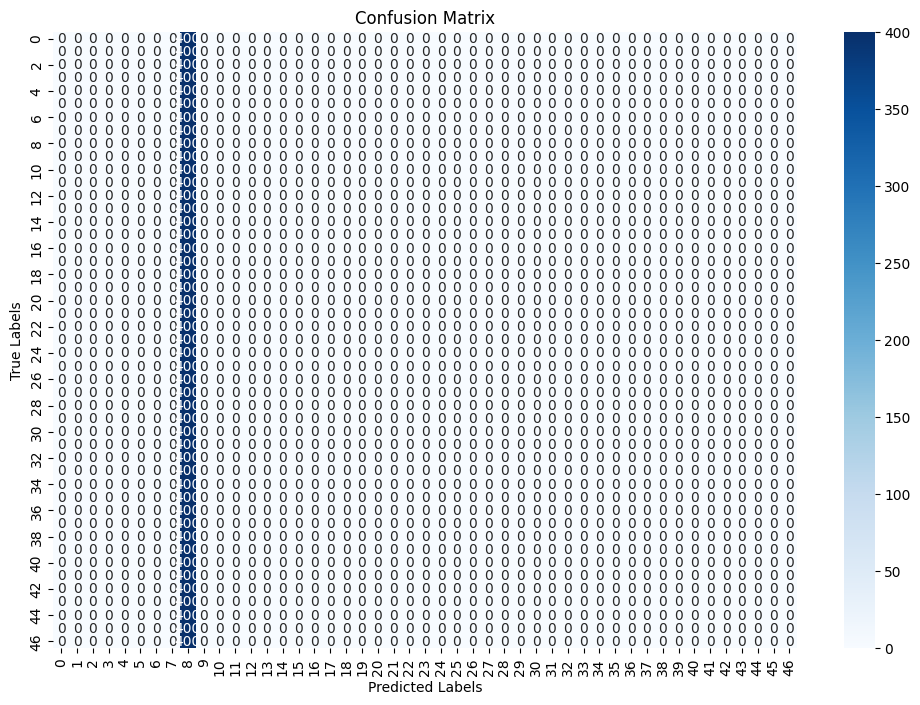


Evaluating Model...
Model Accuracy: 0.2344

Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.38      0.17       400
           1       0.40      0.58      0.47       400
           2       0.10      0.22      0.13       400
           3       0.20      0.36      0.26       400
           4       0.10      0.21      0.13       400
           5       0.14      0.27      0.19       400
           6       0.30      0.45      0.36       400
           7       0.36      0.56      0.44       400
           8       0.13      0.18      0.15       400
           9       0.27      0.35      0.31       400
          10       0.11      0.13      0.12       400
          11       0.23      0.30      0.26       400
          12       0.15      0.19      0.16       400
          13       0.16      0.17      0.16       400
          14       0.21      0.16      0.18       400
          15       0.17      0.17      0.17       400
          16 

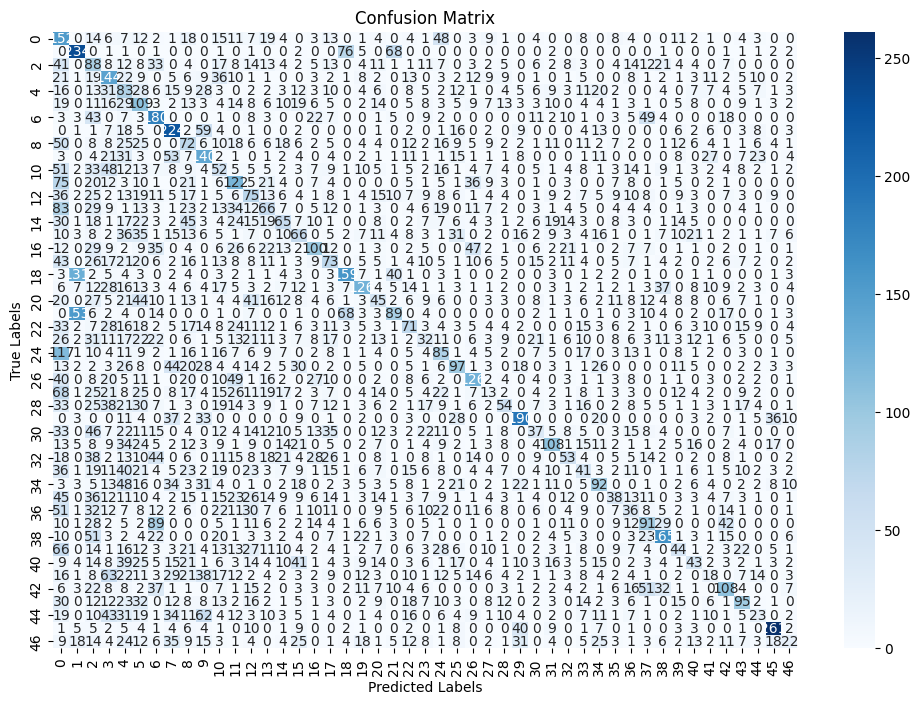


Evaluating Model...
Model Accuracy: 0.2479

Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.07      0.08       400
           1       0.48      0.66      0.56       400
           2       0.19      0.15      0.17       400
           3       0.32      0.33      0.32       400
           4       0.20      0.12      0.15       400
           5       0.26      0.10      0.14       400
           6       0.35      0.45      0.39       400
           7       0.40      0.53      0.45       400
           8       0.45      0.13      0.21       400
           9       0.31      0.41      0.35       400
          10       0.18      0.13      0.15       400
          11       0.23      0.38      0.29       400
          12       0.13      0.18      0.15       400
          13       0.10      0.23      0.14       400
          14       0.30      0.10      0.16       400
          15       0.15      0.12      0.13       400
          16 

c:\Users\syamg\Desktop\emnist_ml_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\syamg\Desktop\emnist_ml_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\syamg\Desktop\emnist_ml_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

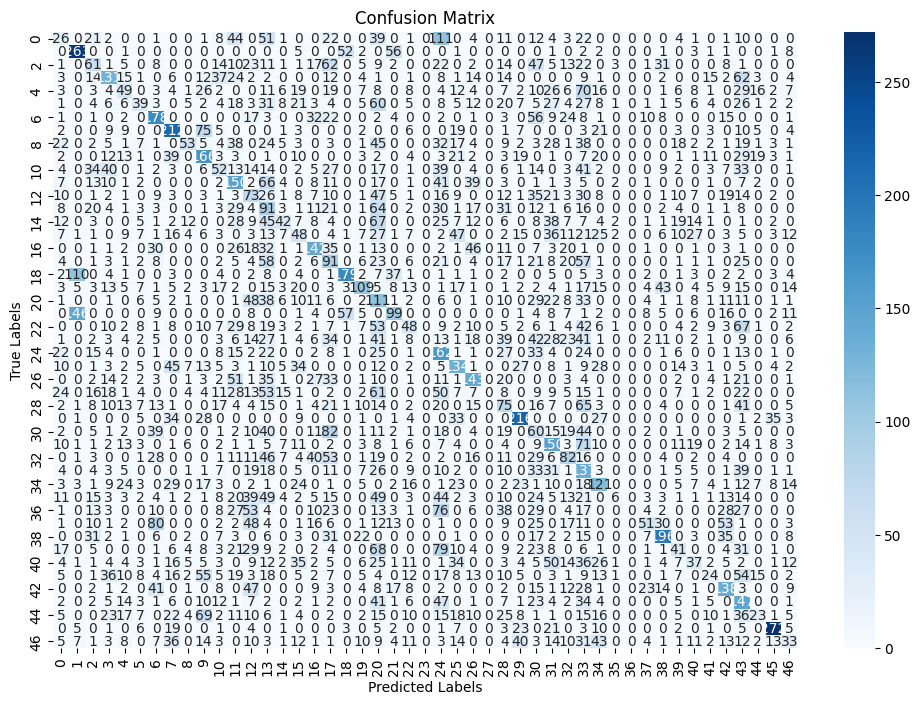

In [7]:
# 7. Loading and Using Saved Models
import joblib

def load_model(model_name):
    """
    Loads a trained model from the models/ directory.

    Parameters:
        model_name (str): Name of the model file to load.

    Returns:
        model: Loaded model object.
    """
    model_path = os.path.join('../models', model_name)
    model = joblib.load(model_path)
    print(f"Loaded model: {model_name}")
    return model

# Load and test saved models
print("\nLoading Saved Models...")
loaded_logistic = load_model("logistic_regression.pkl")
loaded_knn = load_model("knn.pkl")
loaded_decision_tree = load_model("decision_tree.pkl")

# Evaluate loaded models
print("\nEvaluating Loaded Models...")
evaluate_model(loaded_logistic, X_test_flat, y_test_numeric)
evaluate_model(loaded_knn, X_test_flat, y_test_numeric)
evaluate_model(loaded_decision_tree, X_test_flat, y_test_numeric)
